# Group 2

| Group Member | Student ID | Contribution |
| --- | --- | --- |
| Anton Rahul Obordo Karve | 1007168 | ??? |
| Muhammad Asyraf bin Omar | 1006938 | ??? |
| Umali Mike Guil Anonuevo | 1006641 | ??? |
| Ng Kin Meng | 1006945 | ??? |
| Aron Lee Zhong Wei | 1007203 | ??? |

# Problem Statement




*   Background description of the problem.
*   User Persona (Government and NGO?)
*   Problem Statement using “how might we ...” statement



# Data
* Link to data sources.

> * Average Consumer Price of Rice per kg (USD)
> > * https://data.humdata.org/dataset/wfp-food-prices-for-indonesia
> > * https://data.humdata.org/dataset/wfp-food-prices-for-vietnam
> > * https://data.humdata.org/dataset/wfp-food-prices-for-thailand
> > * https://data.humdata.org/dataset/wfp-food-prices-for-philippines
> > * https://data.humdata.org/dataset/wfp-food-prices-for-cambodia

> * Average Producer Price of Rice per kg (USD)
> > * https://data.humdata.org/dataset/faostat-food-prices-for-indonesia
> > * https://data.humdata.org/dataset/faostat-food-prices-for-vietnam
> > * https://data.humdata.org/dataset/faostat-food-prices-for-thailand
> > * https://data.humdata.org/dataset/faostat-food-prices-for-philippines
> > * https://data.humdata.org/dataset/faostat-food-prices-for-cambodia

> * GDP per capita (constant 2015 US$)
> > * https://data.humdata.org/dataset/world-bank-economy-and-growth-indicators-for-indonesia
> > * https://data.humdata.org/dataset/world-bank-economy-and-growth-indicators-for-vietnam
> > * https://data.humdata.org/dataset/world-bank-economy-and-growth-indicators-for-thailand
> > * https://data.humdata.org/dataset/world-bank-economy-and-growth-indicators-for-philippines
> > * https://data.humdata.org/dataset/world-bank-economy-and-growth-indicators-for-cambodia

> * Pump price for gasoline (US$ per liter)
> > * https://data.humdata.org/dataset/world-bank-energy-and-mining-indicators-for-indonesia
> > * https://data.humdata.org/dataset/world-bank-energy-and-mining-indicators-for-vietnam
> > * https://data.humdata.org/dataset/world-bank-energy-and-mining-indicators-for-thailand
> > * https://data.humdata.org/dataset/world-bank-energy-and-mining-indicators-for-philippines
> > * https://data.humdata.org/dataset/world-bank-energy-and-mining-indicators-for-cambodia


,Rice Produced (tonnes), Population Size,




* Discussion on why these data were used, including any relevant
visualizations and your insight.


* Steps to clean the data and their Python codes

In [1]:
import pandas as pd

In [2]:
#Cleaning GDP
pd_dict = {}

country_codes = ["idn", 'khm', 'phl', 'tha', 'vnm']

#Load the dataframes
for code in country_codes:
    pd_dict[code] = pd.read_csv(f"FINAL DATASETS USED (ORIGINAL + CLEANED)/economy_and_growth_indicators (GDP)/economy-and-growth_{code}.csv")

#Only select rows and columns that I want
for code in country_codes:
    pd_dict[code] = pd_dict[code].loc[pd_dict[code]["Indicator Name"].isin(["GDP per capita (constant 2015 US$)","Inflation, consumer prices (annual %)"]), ["Country Name", "Year", "Indicator Name", "Value"]]

#Join everything together row wise #Reset index
merged_df = pd.concat(pd_dict, ignore_index=True, axis=0)

display(merged_df)

# #Save to csv
# merged_df.to_csv("GDP_inflation_SEA_merged.csv")

,Country Name,Year,Indicator Name,Value
0,Indonesia,2022,"Inflation, consumer prices (annual %)",4.2094638340216
1,Indonesia,2021,"Inflation, consumer prices (annual %)",1.56012990525685
2,Indonesia,2020,"Inflation, consumer prices (annual %)",1.92096800566845
3,Indonesia,2019,"Inflation, consumer prices (annual %)",3.03058664969491
4,Indonesia,2018,"Inflation, consumer prices (annual %)",3.19834641562404
...,...,...,...,...
496,Vietnam,1988,GDP per capita (constant 2015 US$),623.548146261583
497,Vietnam,1987,GDP per capita (constant 2015 US$),606.414001376112
498,Vietnam,1986,GDP per capita (constant 2015 US$),598.915367498239
499,Vietnam,1985,GDP per capita (constant 2015 US$),596.39696645312


In [5]:
#Data Cleaning

countries = ["Indonesia", "Vietnam", "Thailand", "Cambodia", "Philippines"]
country_codes = {"Indonesia":"idn", "Vietnam":"vnm", "Thailand":"tha", "Cambodia":"khm", "Philippines":"phl"}

#Will store the datapoints of each couuntry before combining them all
df_list = []

#Load the inter country datasets as dataframes
df_rice_production = pd.read_csv("FINAL DATASETS USED (ORIGINAL + CLEANED)/rice production across different countries from 1961 to 2021.csv")
df_gdppercapita_inflation = pd.read_csv("FINAL DATASETS USED (ORIGINAL + CLEANED)/economy_and_growth_indicators (GDP)/GDP_inflation_SEA_merged.csv") ##Cleaning GDP was done prior to the rest
df_population = pd.read_csv("FINAL DATASETS USED (ORIGINAL + CLEANED)/Population.csv")

#For each country in the list
for country in countries:
    #Load and clean the consumer prices
    df_consumer_price_country = pd.read_csv(f"FINAL DATASETS USED (ORIGINAL + CLEANED)/Consumer and Producer Food prices/{country}/wfp_food_prices_{country}_clean.csv")
    df_consumer_price_country = df_consumer_price_country.loc[:, ["Country", "Year", "avg_usdprices"]]
    df_consumer_price_country.rename(columns={"avg_usdprices": "Average Consumer Price of Rice per kg (USD)"}, inplace=True)

    #Load and clean the producer prices
    df_producer_price_country = pd.read_csv(f"FINAL DATASETS USED (ORIGINAL + CLEANED)/Consumer and Producer Food prices/{country}/producer-prices_{country}_clean.csv")
    df_producer_price_country = df_producer_price_country.loc[:, ["Year", "Value"]]
    df_producer_price_country.rename(columns={"Value": "Average Producer Price of Rice per kg (USD)"}, inplace=True)

    #Load and clean the fuel prices
    df_gas_price_country = pd.read_csv(f"FINAL DATASETS USED (ORIGINAL + CLEANED)/energy_and_mining (Fuel Price)/energy-and-mining_{country_codes[country]}.csv")
    df_gas_price_country = df_gas_price_country.loc[df_gas_price_country["Indicator Name"]=="Pump price for gasoline (US$ per liter)", ["Year", "Value"]]
    df_gas_price_country.rename(columns={"Value":"Pump price for gasoline (US$ per liter)"}, inplace=True)
    df_gas_price_country["Year"] = df_gas_price_country["Year"].astype("int64")

    #Clean the rice production
    df_rice_production_country = df_rice_production.loc[df_rice_production["Area"] == country, ["Year", "Value"]]
    df_rice_production_country.rename(columns={"Value": "Rice Produced (tonnes)"}, inplace=True)

    #Clean GDP per capita further
    df_gdp_per_capita_country = df_gdppercapita_inflation.loc[(df_gdppercapita_inflation["Country Name"]==country) & (df_gdppercapita_inflation["Indicator Name"]=="GDP per capita (constant 2015 US$)"), ["Year", "Value"]]
    df_gdp_per_capita_country.rename(columns={"Value": "GDP per capita (constant 2015 US$)"}, inplace=True)

    #Clean population size
    df_pop_country = df_population.loc[df_population["Country Name"]==country, ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]]
    df_pop_country = df_pop_country.transpose()
    df_pop_country.reset_index(inplace=True)
    df_pop_country.rename(columns={"index": "Year", df_pop_country.columns[1]: "Population Size"}, inplace=True)
    df_pop_country["Year"] = df_pop_country["Year"].astype("int64")


    #Combining everything by year
    merged = pd.merge(df_consumer_price_country, df_rice_production_country, on="Year", how="outer")
    merged = pd.merge(merged, df_gdp_per_capita_country, on="Year", how="outer")
    merged = pd.merge(merged, df_producer_price_country, on="Year", how="outer")
    merged = pd.merge(merged, df_pop_country, on="Year", how="outer")


    #Drop any rows with empty data
    merged.dropna(inplace=True)


    #Want to interpolate for gas price because its just one year gaps
    merged = pd.merge(merged, df_gas_price_country, on="Year", how="outer")

    merged["Pump price for gasoline (US$ per liter)"] = merged["Pump price for gasoline (US$ per liter)"].fillna(method='backfill')

    df_list.append(merged)


#Combine all 5 countries' datapoints together
all_combined = pd.concat(df_list, axis=0)
all_combined.dropna(inplace=True) #Just as a final check
all_combined.reset_index(inplace=True)
all_combined.drop("index", axis=1, inplace=True) #Resetting index shifts the exisitng index as a new column, drop it

display(all_combined)

# #Save to csv
# all_combined.to_csv("FINAL DATASET.csv")

,Country,Year,Average Consumer Price of Rice per kg (USD),Rice Produced (tonnes),GDP per capita (constant 2015 US$),Average Producer Price of Rice per kg (USD),Population Size,Pump price for gasoline (US$ per liter)
0,Indonesia,2008,0.66,57661000.00,2487.611297,0.28,237936543.0,0.5
1,Indonesia,2009,0.67,59014000.00,2569.874213,0.21,240981299.0,0.79
2,Indonesia,2010,0.65,59283000.00,2695.868170,0.30,244016173.0,0.79
3,Indonesia,2011,0.88,58259000.00,2826.480441,0.88,247099697.0,0.47
4,Indonesia,2012,1.06,59705000.00,2959.514478,0.88,250222695.0,0.47
...,...,...,...,...,...,...,...,...
71,Philippines,2017,0.79,19276346.63,3289.472272,0.36,106738501.0,0.37
72,Philippines,2018,0.75,19066093.94,3439.100528,0.38,108568836.0,0.37
73,Philippines,2019,0.78,18814827.29,3589.613641,0.33,110380804.0,0.37
74,Philippines,2020,0.72,19294855.51,3195.538887,0.34,112190977.0,0.37


# Model
* Discussion on the predictors or features.
* Discussion on building the model and their Python codes.
* Any other relevant mathematical details.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
####
#Functions to perform linear regression and metrics
####
def normalize_z(dfin, columns_means=None, columns_stds=None):
    if columns_means is None:
        columns_means = dfin.mean()
    if columns_stds is None:
        columns_stds = dfin.std()

    dfout = (dfin - columns_means) / columns_stds

    return dfout, columns_means, columns_stds

#feature_names and target_names are lists
def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names].copy()
    df_target = df[target_names].copy()

    return df_feature, df_target

#Convert to numpy, and add a column of 1s
def prepare_feature(df_feature):
    #Assume df feature CANNOT be a series because get_features_targets makes sure that they are dataframes
    if isinstance(df_feature, pd.DataFrame):
        np_feature = df_feature.to_numpy()
    else:
        np_feature = df_feature

    #Get number of rows
    num_rows = np_feature.shape[0]
    #Create a column of ones
    ones_col = np.ones((num_rows, 1))

    #Concatenate them horizontally
    X = np.concatenate((ones_col, np_feature), axis=1)

    #Return X
    return X


def prepare_target(df_target):
    #Assume df target CANNOT be a series because get_features_targets makes sure that they are dataframes
    if isinstance(df_target, pd.DataFrame):
        np_target = df_target.to_numpy()
    else:
        np_target = df_target

    return np_target #this is just y


#Normalizes features, prepare the data, then do prediction
def predict_linreg(df_feature, beta, means=None, stds=None):
    #Normalize features
    df_feature_z, _, _ = normalize_z(df_feature, means, stds)

    #Prepare the feature (convert to numpy and add column of 1)
    X = prepare_feature(df_feature_z) #I FORGOT THE Z FFS

    ypred = calc_linreg(X, beta)

    return ypred


def calc_linreg(X, beta):
    #Its just ypred = Xb #X matrix multiply b
    return np.matmul(X, beta)


def split_data(df_feature, df_target, random_state=None, test_size=0.5):

    #Get all indexs
    all_indexs = df_target.index #can take from df_feature too, doesnt matter

    #Get the test indexs
    np.random.seed(random_state)

    test_indexs = sorted(list(np.random.choice(all_indexs, size = int(len(all_indexs)*test_size), replace = False)))

    #Start splitting
    df_feature_test = df_feature.loc[test_indexs, : ]
    df_target_test = df_target.loc[test_indexs, : ]

    df_feature_train = df_feature.drop(test_indexs)
    df_target_train = df_target.drop(test_indexs)


    return df_feature_train, df_feature_test, df_target_train, df_target_test

def compute_cost_linreg(X, y, beta):
    #Get predictions
    ypred = calc_linreg(X, beta)

    #Get errors (residuals)
    errors = y - ypred

    #Calculate cost (loss)
    m = y.shape[0] #Number of rows / datapoints #Can take x.shape[0], its the same
    J = (np.matmul(errors.T, errors)) / (2*m)

    return J[0][0]

def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    J_storage = np.zeros(num_iters)

    m = y.shape[0]
    for i in range(num_iters):
        #Get the prediction
        ypred = calc_linreg(X, beta)

        #Get the error
        errors = ypred - y #MUST BE YPRED - Y NOT THE OTHER WAY AROUND.

        #Get the derivative
        derivs = np.matmul(X.T, errors) / m

        #Calculate the new beta
        beta = beta - (alpha*derivs)

        #Calculate the cost
        J = compute_cost_linreg(X, y, beta)

        #Add cost to Jstorage
        J_storage[i] = J

    return beta, J_storage


def r2_score(y, ypred):
    residuals = y-ypred
    SSres = np.matmul(residuals.T, residuals)
    #print(SSres)

    totals = y - np.mean(y)
    SStot = np.matmul(totals.T, totals)
    #print(SStot)

    r2 = 1 - (SSres/SStot)
    return r2[0][0]

#AKA coefficient of multiple determination
def adjusted_r2_score(r2, n, p):
    #n = size of training dataset
    #p = number of independent variables (features)
    return 1-(1-r2)*(n-1)/(n-p-1)

def mean_squared_error(target, pred):
    error = target - pred
    mse = np.matmul(error.T, error) / len(pred)
    return mse[0][0]

In [8]:
####
#Performing multiple linear regression
####


# Read the CSV file
df = pd.read_csv("FINAL DATASETS USED (ORIGINAL + CLEANED)\FINAL DATASET.csv")


# Extract the features and the targets
df_features, df_target = get_features_targets(df, [
    "Rice Produced (tonnes)",
    "GDP per capita (constant 2015 US$)",
    "Average Producer Price of Rice per kg (USD)",
    "Population Size",
    "Pump price for gasoline (US$ per liter)"
        ],

    ["Average Consumer Price of Rice per kg (USD)"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# Normalize the features using z normalization
df_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)


iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1],1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)




# Model Evaluation
* Discussion on the chosen metric to evaluate your final model, how that
model compares with your earlier attempts, any mathematical details, and
all resources consulted.
* Code and results of the metric on your test data set

In [9]:
####
#Metrics Evaluation
####

# call the predict() method
pred = predict_linreg(df_features_test, beta, means, stds) #Predict with TEST DATA

# change target test set to a numpy array
target = prepare_target(df_target_test)

# Calculate r2 score by calling a function
r2 = r2_score(target, pred)

print("r2 Score: ", r2)

# Calculate the mse
mse = mean_squared_error(target, pred)

print("Mean squared error: ", mse)

#Calculate adjusted r2 for multiple linear regression
adjusted_r2 = adjusted_r2_score(r2, n=X.shape[0], p=X.shape[1])

print("Adjusted r2 Score: ", adjusted_r2)


#Show coeficient values
print("Coefficient (beta) Values:")
print(list(zip(["Constant"]+list(df_features.columns), list(beta))))

r2 Score:  0.8971601045700476
Mean squared error:  0.009028067944013089
Adjusted r2 Score:  0.8840316072811175
Coefficient (beta) Values:
[('Constant', array([0.52333318])), ('Rice Produced (tonnes)', array([-0.14693461])), ('GDP per capita (constant 2015 US$)', array([0.02707405])), ('Average Producer Price of Rice per kg (USD)', array([0.10098337])), ('Population Size', array([0.25212224])), ('Pump price for gasoline (US$ per liter)', array([0.04024201]))]


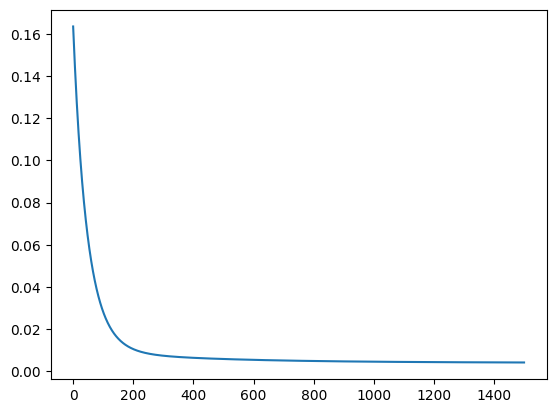

In [10]:
# J_storage visualization
plt.plot(J_storage)

Text(0.5, 1.0, 'Average Consumer Price per kg (USD) vs Pump price for gasoline (US$ per liter)')

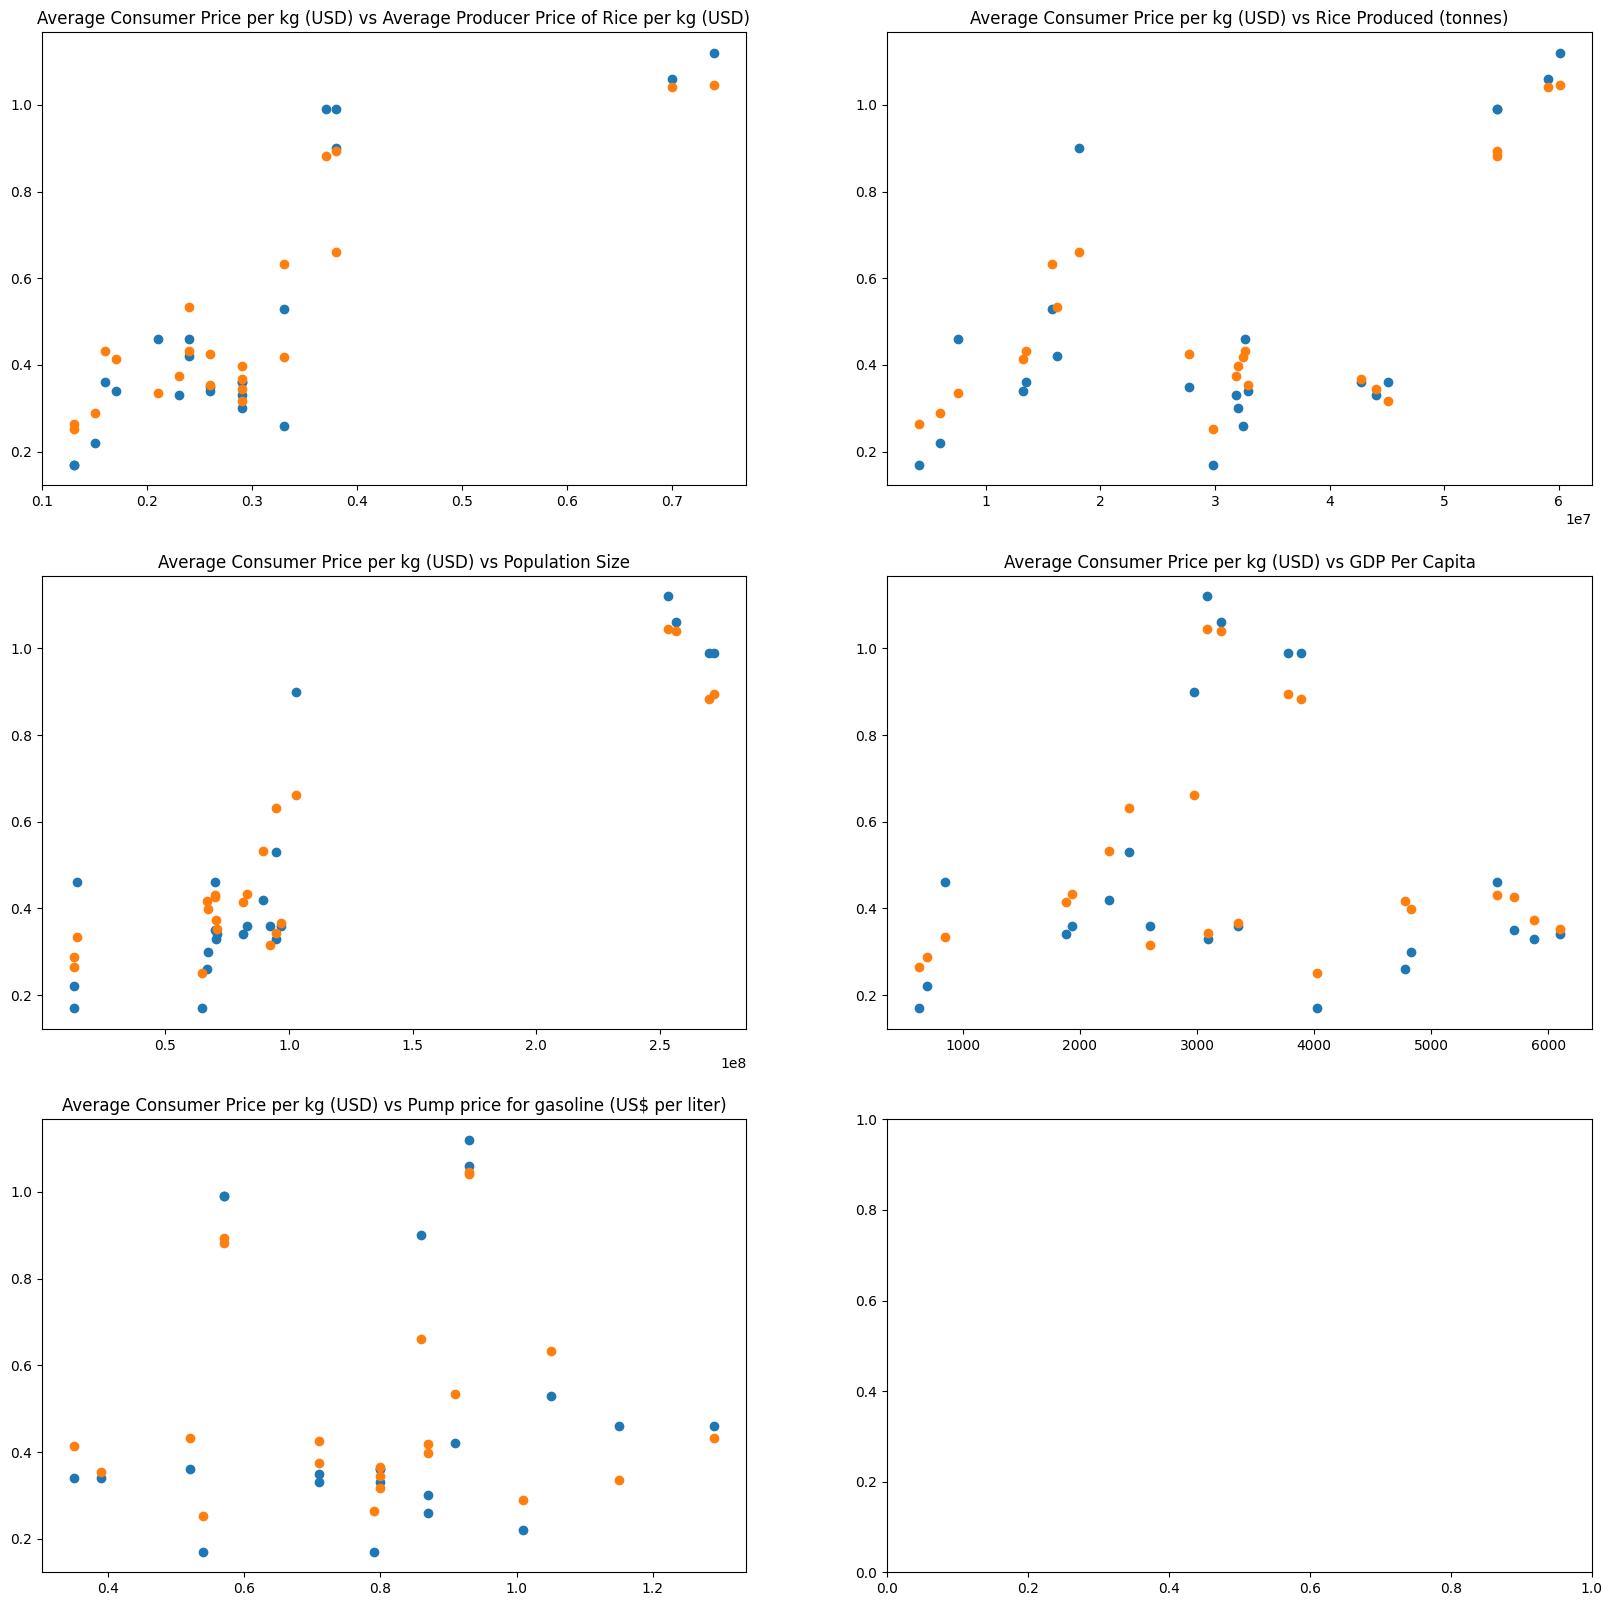

In [11]:
####
#Graphical Evaluation
####

#Predicting with Test dataset
pred = predict_linreg(df_features_test, beta, means, stds)


fig, axs = plt.subplots(3, 2, figsize=(20,20))

axs[0,0].scatter(df_features_test["Average Producer Price of Rice per kg (USD)"], df_target_test)
axs[0,0].scatter(df_features_test["Average Producer Price of Rice per kg (USD)"], pred)
axs[0,0].set_title('Average Consumer Price per kg (USD) vs Average Producer Price of Rice per kg (USD)')

axs[0,1].scatter(df_features_test["Rice Produced (tonnes)"], df_target_test)
axs[0,1].scatter(df_features_test["Rice Produced (tonnes)"], pred)
axs[0,1].set_title('Average Consumer Price per kg (USD) vs Rice Produced (tonnes)')


axs[1,0].scatter(df_features_test["Population Size"], df_target_test)
axs[1,0].scatter(df_features_test["Population Size"], pred)
axs[1,0].set_title('Average Consumer Price per kg (USD) vs Population Size')


axs[1,1].scatter(df_features_test["GDP per capita (constant 2015 US$)"], df_target_test)
axs[1,1].scatter(df_features_test["GDP per capita (constant 2015 US$)"], pred)
axs[1,1].set_title('Average Consumer Price per kg (USD) vs GDP Per Capita')


axs[2,0].scatter(df_features_test["Pump price for gasoline (US$ per liter)"], df_target_test)
axs[2,0].scatter(df_features_test["Pump price for gasoline (US$ per liter)"], pred)
axs[2,0].set_title('Average Consumer Price per kg (USD) vs Pump price for gasoline (US$ per liter)')


Text(0.5, 1.0, 'Average Consumer Price per kg (USD) vs Pump price for gasoline (US$ per liter)')

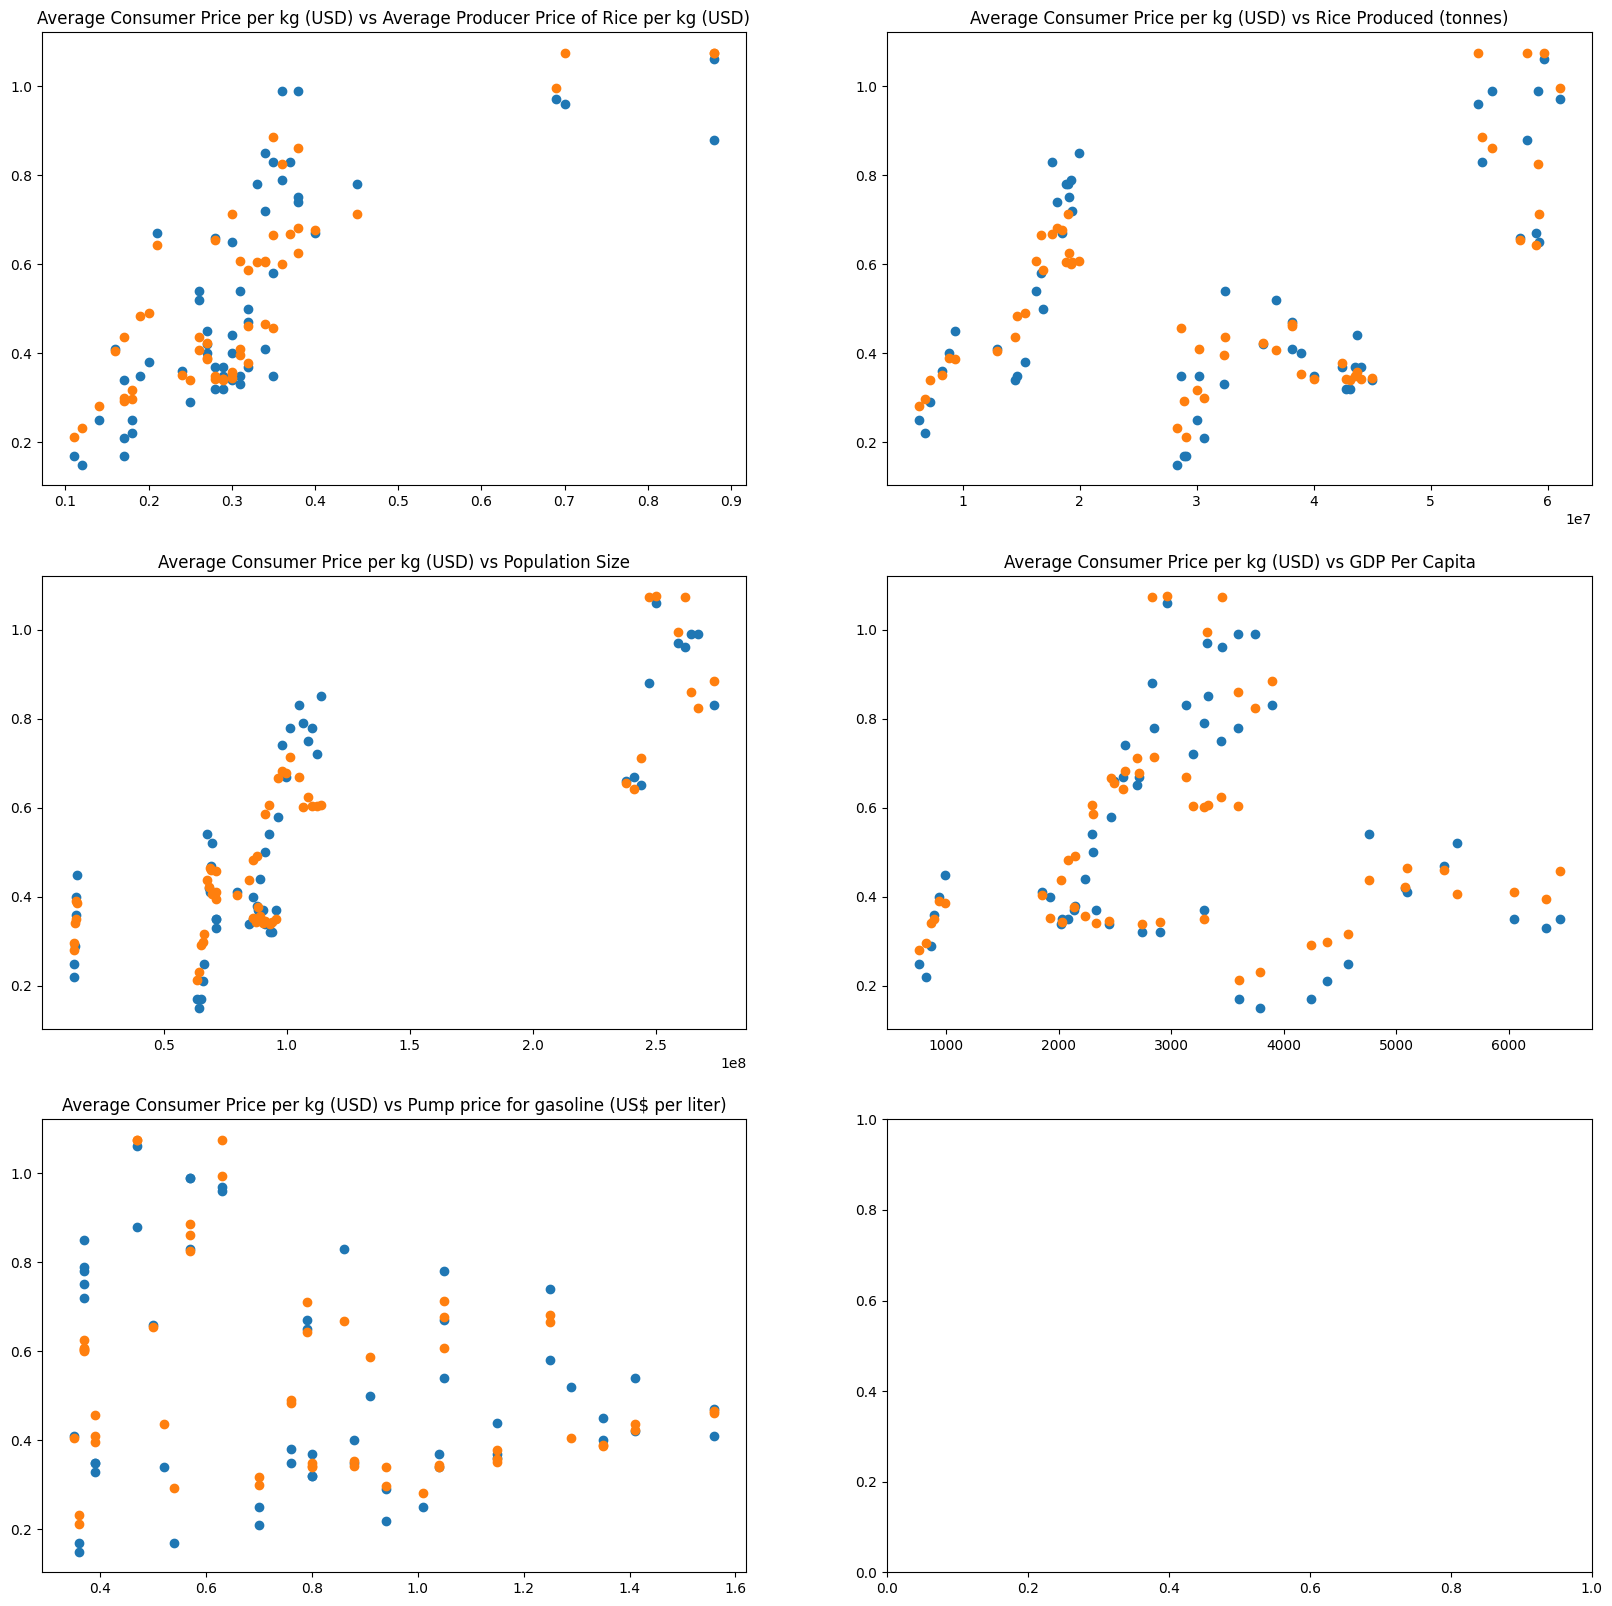

In [12]:
#This is more to see the line of best fit from training

pred_with_train = predict_linreg(df_features_train, beta, means, stds) #Predict with TRAIN DATA


fig, axs = plt.subplots(3, 2, figsize=(20,20))

axs[0,0].scatter(df_features_train["Average Producer Price of Rice per kg (USD)"], df_target_train)
axs[0,0].scatter(df_features_train["Average Producer Price of Rice per kg (USD)"], pred_with_train)
axs[0,0].set_title('Average Consumer Price per kg (USD) vs Average Producer Price of Rice per kg (USD)')

axs[0,1].scatter(df_features_train["Rice Produced (tonnes)"], df_target_train)
axs[0,1].scatter(df_features_train["Rice Produced (tonnes)"], pred_with_train)
axs[0,1].set_title('Average Consumer Price per kg (USD) vs Rice Produced (tonnes)')

axs[1,0].scatter(df_features_train["Population Size"], df_target_train)
axs[1,0].scatter(df_features_train["Population Size"], pred_with_train)
axs[1,0].set_title('Average Consumer Price per kg (USD) vs Population Size')

axs[1,1].scatter(df_features_train["GDP per capita (constant 2015 US$)"], df_target_train)
axs[1,1].scatter(df_features_train["GDP per capita (constant 2015 US$)"], pred_with_train)
axs[1,1].set_title('Average Consumer Price per kg (USD) vs GDP Per Capita')

axs[2,0].scatter(df_features_train["Pump price for gasoline (US$ per liter)"], df_target_train)
axs[2,0].scatter(df_features_train["Pump price for gasoline (US$ per liter)"], pred_with_train)
axs[2,0].set_title('Average Consumer Price per kg (USD) vs Pump price for gasoline (US$ per liter)')

In [13]:
####
#Saving the model
####
#Save beta, means and stds values as pickle
# import pickle as pkl
# with open("final_beta_means_stds.pkl", "wb") as f1:

#     pkl.dump((beta, means, stds), f1)

# Discussion of the result

# Discussion of your code and steps taken to improve the accuracy of your model